# Experiment 1 - feature selection least missing values

In [1]:
import preprocessors

myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.ARIMA_VAR_preprocessor(max_patients=100, min_time_points=30)
y_train, y_pred = myLoader.split_train_test(df, 4)

Patient 0: Dropping — constant columns found
Patient 1: Less than 30 time points — skipping.
Patient 3: Less than 30 time points — skipping.
Patient 4: Dropping — constant columns found
Patient 5: Less than 30 time points — skipping.
Patient 9: Less than 30 time points — skipping.
Patient 10: Dropping — constant columns found
Patient 11: Less than 30 time points — skipping.
Patient 12: Dropping — constant columns found
Patient 14: Less than 30 time points — skipping.
Patient 15: Less than 30 time points — skipping.
Patient 16: Dropping — constant columns found
Patient 19: Less than 30 time points — skipping.
Patient 21: Less than 30 time points — skipping.
Patient 22: Less than 30 time points — skipping.
Patient 23: Dropping — constant columns found
Patient 24: Dropping — constant columns found
Patient 25: Less than 30 time points — skipping.
Patient 26: Less than 30 time points — skipping.
Patient 31: Dropping — constant columns found
Patient 32: Dropping — constant columns found
Pati

In [3]:
# to just select HR, ignore X_train, X_pred
#y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ["HR"], ['O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])

In [44]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA
model = AutoARIMA(seasonal=False, max_order=50)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to 

In [46]:
model.get_fitted_params()

{'forecasters':                                          HR  \
 0   AutoARIMA(max_order=50, seasonal=False)   
 1   AutoARIMA(max_order=50, seasonal=False)   
 2   AutoARIMA(max_order=50, seasonal=False)   
 3   AutoARIMA(max_order=50, seasonal=False)   
 4   AutoARIMA(max_order=50, seasonal=False)   
 ..                                      ...   
 92  AutoARIMA(max_order=50, seasonal=False)   
 93  AutoARIMA(max_order=50, seasonal=False)   
 94  AutoARIMA(max_order=50, seasonal=False)   
 95  AutoARIMA(max_order=50, seasonal=False)   
 96  AutoARIMA(max_order=50, seasonal=False)   
 
                                       O2Sat  \
 0   AutoARIMA(max_order=50, seasonal=False)   
 1   AutoARIMA(max_order=50, seasonal=False)   
 2   AutoARIMA(max_order=50, seasonal=False)   
 3   AutoARIMA(max_order=50, seasonal=False)   
 4   AutoARIMA(max_order=50, seasonal=False)   
 ..                                      ...   
 92  AutoARIMA(max_order=50, seasonal=False)   
 93  AutoARIMA(max_orde

In [ ]:
model.get

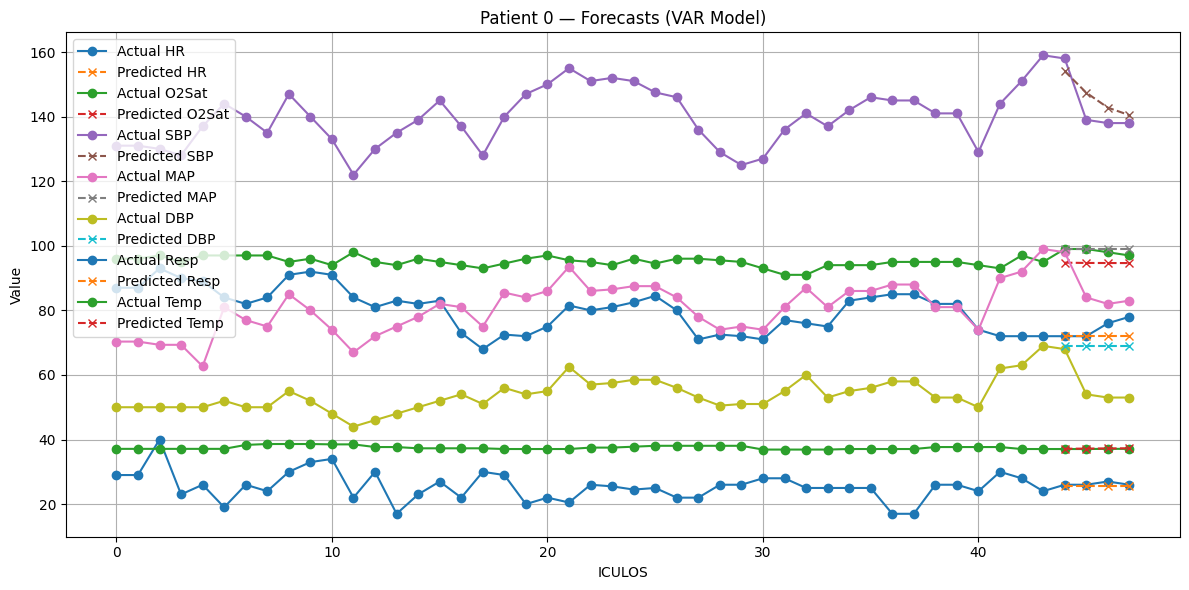

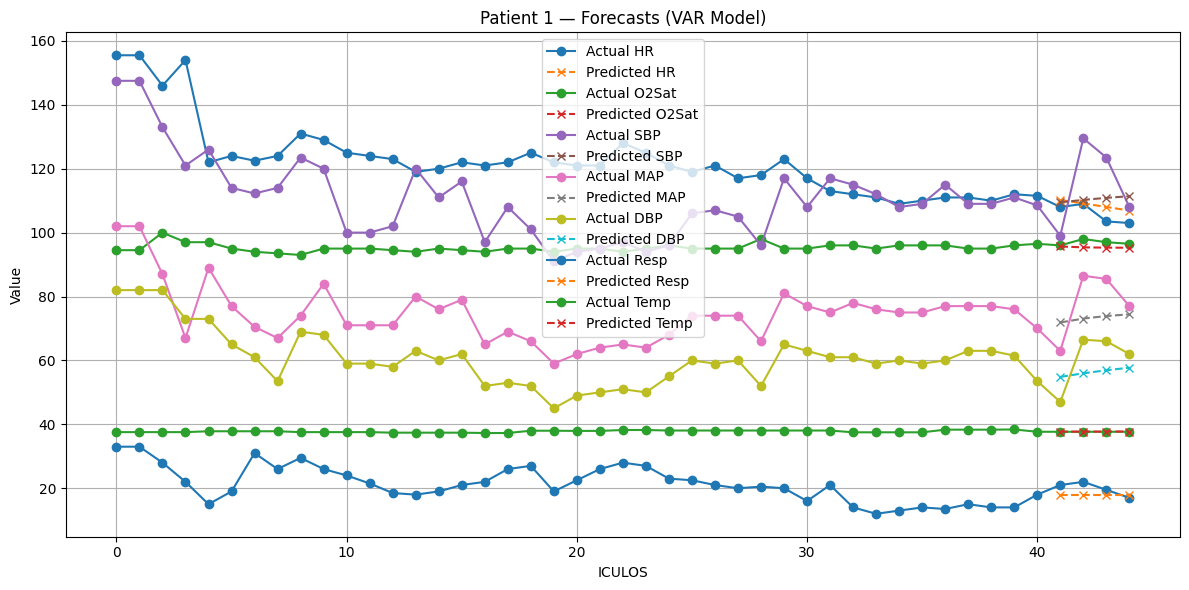

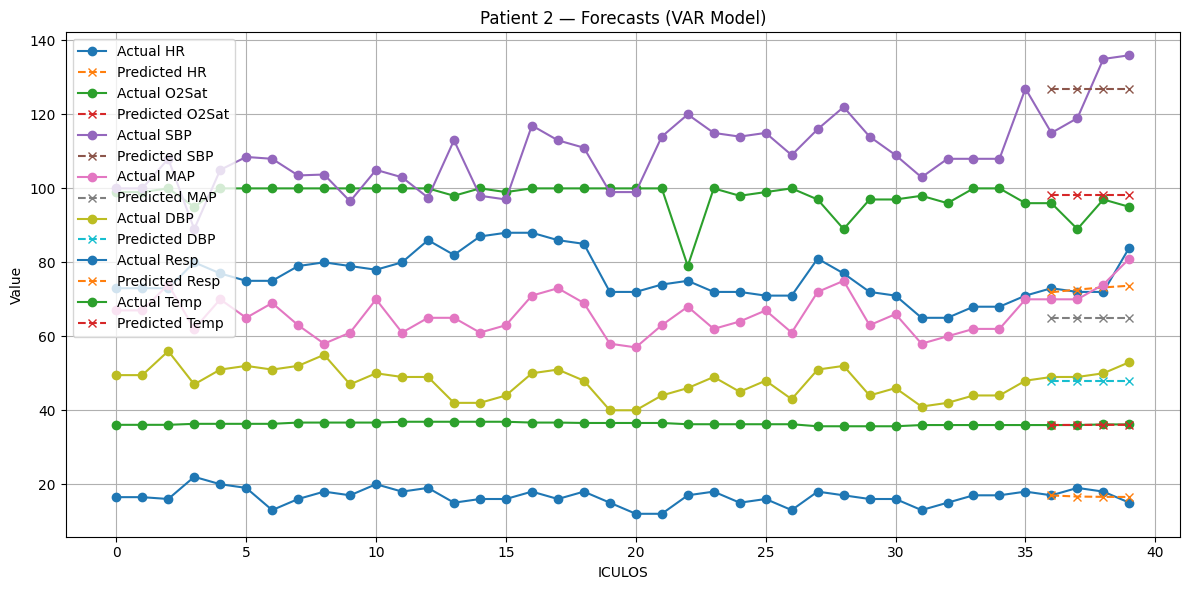

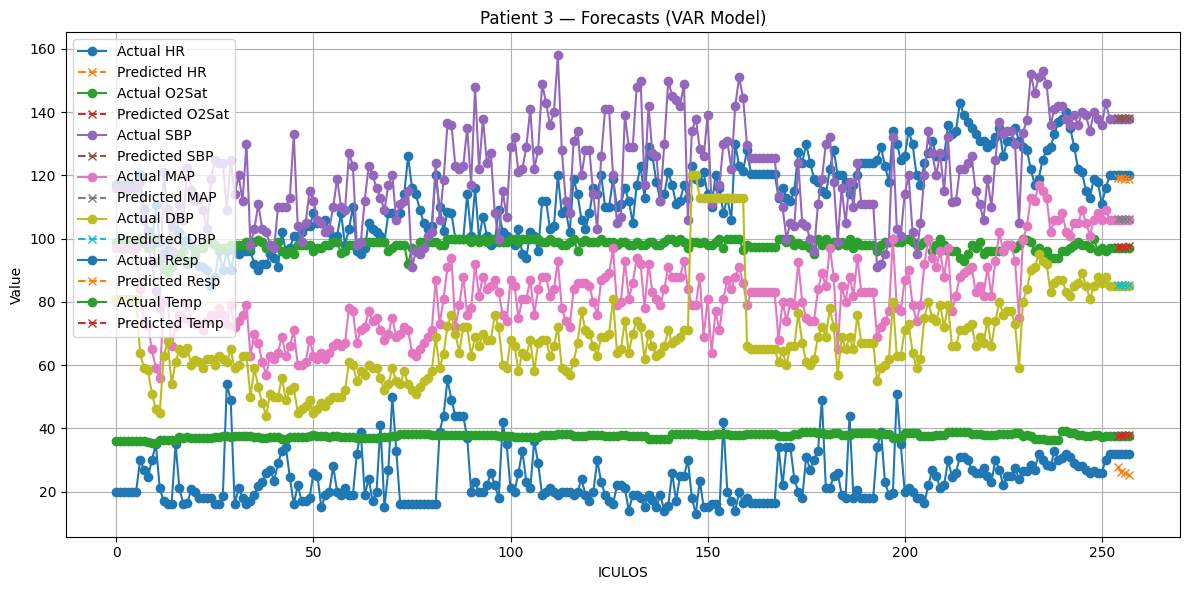

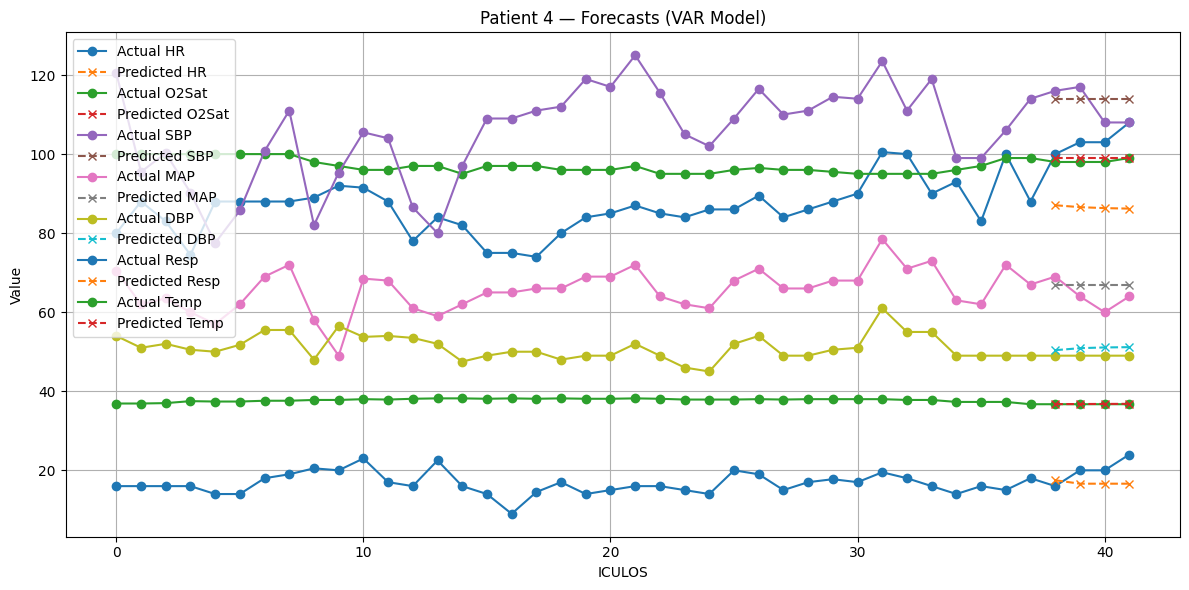

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

patient_data_combined = pd.concat([y_train, y_pred], axis=0)

for pid in y_pred.index.get_level_values("Patient_ID").unique():
    if pid > 4:
        break

    plt.figure(figsize=(12, 6))
    for feature in y_pred.columns:
        actual_series = patient_data_combined.loc[pid, feature]
        forecast_series = forecasts.loc[pid, feature]

        plt.plot(actual_series.index, actual_series, label=f"Actual {feature}", linestyle="-", marker="o")
        plt.plot(forecast_series.index, forecast_series, label=f"Predicted {feature}", linestyle="--", marker="x")

    plt.title(f"Patient {pid} — Forecasts (VAR Model)")
    plt.xlabel("ICULOS")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
import evaluators

myEvaluator = evaluators.Evaluator(y_pred, forecasts)
myEvaluator.sktime_dtw()
myEvaluator.sktime_ddtw()
myEvaluator.tslearn_dtw()

Mean sktime DTW distance for feature HR: 230.27621558937923
Mean sktime DTW distance for feature O2Sat: 16.284699945168327
Mean sktime DTW distance for feature SBP: 964.8220168052546
Mean sktime DTW distance for feature MAP: 609.2509316542045
Mean sktime DTW distance for feature DBP: 198.28261014250586
Mean sktime DTW distance for feature Resp: 62.01272348707882
Mean sktime DTW distance for feature Temp: 0.6433589127445908
Mean sktime DDTW distance for feature HR: 40.4345077675462
Mean sktime DDTW distance for feature O2Sat: 3.2615403305328314
Mean sktime DDTW distance for feature SBP: 213.3892466088358
Mean sktime DDTW distance for feature MAP: 96.4480461699102
Mean sktime DDTW distance for feature DBP: 39.09366288083101
Mean sktime DDTW distance for feature Resp: 18.171058020273982
Mean sktime DDTW distance for feature Temp: 0.06361234192895963
Mean tslearn DTW distance: 38.14239926790764


# Experiment 2 - xgboost features

In [24]:
import preprocessors

myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'Temp', 'PTT', 'Platelets', 'WBC', 'Glucose'])
df = myLoader.ARIMA_VAR_preprocessor(max_patients=100, min_time_points=30)
y_train, y_pred = myLoader.split_train_test(df, 4)

Patient 0: Dropping — constant columns found
Patient 1: Less than 30 time points — skipping.
Patient 2: Dropping — constant columns found
Patient 3: Less than 30 time points — skipping.
Patient 4: Dropping — constant columns found
Patient 5: Less than 30 time points — skipping.
Patient 7: Dropping — constant columns found
Patient 9: Less than 30 time points — skipping.
Patient 10: Dropping — constant columns found
Patient 11: Less than 30 time points — skipping.
Patient 12: Dropping — constant columns found
Patient 14: Less than 30 time points — skipping.
Patient 15: Less than 30 time points — skipping.
Patient 16: Dropping — constant columns found
Patient 17: Dropping — constant columns found
Patient 18: Dropping — constant columns found
Patient 19: Less than 30 time points — skipping.
Patient 20: Dropping — constant columns found
Patient 21: Less than 30 time points — skipping.
Patient 22: Less than 30 time points — skipping.
Patient 24: Dropping — constant columns found
Patient 25: 

In [25]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA
model2 = AutoARIMA(seasonal=False, max_order=50)

model2.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts2 = model2.predict(forecast_horizon)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

In [26]:
forecasts2

HR       Temp        PTT   Platelets        WBC  \
Patient_ID ICULOS                                                            
0          41      110.199596  37.700521  27.100000   42.955936   8.805336   
           42      109.148738  37.722475  27.100000   42.915783   8.818061   
           43      108.020078  37.738267  27.100000   42.879194   8.836255   
           44      106.915674  37.749627  27.100000   42.845852   8.857793   
1          254     119.296451  37.746438  24.313043  761.747036  14.400000   
...                       ...        ...        ...         ...        ...   
88         73       57.971267  37.390000  22.700000  116.000000  11.300000   
89         54       95.581075  37.500000  32.600000  178.000000   7.200000   
           55       95.581075  37.500000  32.600000  178.000000   7.200000   
           56       95.581075  37.500000  32.600000  178.000000   7.200000   
           57       95.581075  37.500000  32.600000  178.000000   7.200000   

                      Glucose  
Patient_ID ICULOS              
0          41      242.182887  
           42      237.839521  
           43      233.923311  
           44      230.392248  
1          254     119.000000  
...                       ...  
88         73      104.504224  
89         54       85.000000  
           55       85.000000  
           56       85.000000  
           57       85.000000  

[360 rows x 6 columns]

In [27]:
import evaluators
myEvaluator2 = evaluators.Evaluator(y_pred, forecasts2)
myEvaluator2.sktime_dtw()
myEvaluator2.sktime_ddtw()
myEvaluator2.tslearn_dtw()

Mean sktime DTW distance for feature HR: 408.95020297401715
Mean sktime DTW distance for feature Temp: 7.844410280086082
Mean sktime DTW distance for feature PTT: 533.8603907961866
Mean sktime DTW distance for feature Platelets: 1693.086031324135
Mean sktime DTW distance for feature WBC: 7.342130438358633
Mean sktime DTW distance for feature Glucose: 2451.8084706367076
Mean sktime DDTW distance for feature HR: 91.51407663920902
Mean sktime DDTW distance for feature Temp: 1.2794313866136653
Mean sktime DDTW distance for feature PTT: 95.71132705614023
Mean sktime DDTW distance for feature Platelets: 153.78734763607005
Mean sktime DDTW distance for feature WBC: 0.22033404323042027
Mean sktime DDTW distance for feature Glucose: 150.00077027323124
Mean tslearn DTW distance: 42.161890699837855


In [31]:
from sktime.distances import ddtw_distance
import numpy as np

series1 = np.array(y_pred.loc[0])
series2 = np.array(forecasts.loc[0])
print(series1)
print(series2)
test = ddtw_distance(series1, series2)

print(f"sktimes dtw: {test}")

from tslearn.metrics import dtw

#series1 = y_pred.loc[0]
#series2 = forecasts.loc[0]
print(series1)
print(series2)
test = dtw(series1, series2)
print(f"tslearn dtw: {test}")

[[81.]
 [85.]
 [86.]
 [84.]]
[[ 75.52509048]
 [ 86.41115519]
 [102.43091054]
 [102.43091054]]
sktimes dtw: 217.96816249135182
[[81.]
 [85.]
 [86.]
 [84.]]
[[ 75.52509048]
 [ 86.41115519]
 [102.43091054]
 [102.43091054]]
tslearn dtw: 25.330599631000645


# Testing sktime feature selection

In [21]:
import preprocessors

myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp'])
df = myLoader.ARIMA_VAR_preprocessor(max_patients=100, min_time_points=30)
y_train, y_pred = myLoader.split_train_test(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ["HR"], ['O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])

Patient 0: Dropping — constant columns found
Patient 1: Less than 30 time points — skipping.
Patient 3: Less than 30 time points — skipping.
Patient 4: Dropping — constant columns found
Patient 5: Less than 30 time points — skipping.
Patient 9: Less than 30 time points — skipping.
Patient 10: Dropping — constant columns found
Patient 11: Less than 30 time points — skipping.
Patient 12: Dropping — constant columns found
Patient 14: Less than 30 time points — skipping.
Patient 15: Less than 30 time points — skipping.
Patient 16: Dropping — constant columns found
Patient 19: Less than 30 time points — skipping.
Patient 21: Less than 30 time points — skipping.
Patient 22: Less than 30 time points — skipping.
Patient 23: Dropping — constant columns found
Patient 24: Dropping — constant columns found
Patient 25: Less than 30 time points — skipping.
Patient 26: Less than 30 time points — skipping.
Patient 31: Dropping — constant columns found
Patient 32: Dropping — constant columns found
Pati

In [22]:
from sktime.transformations.series.feature_selection import FeatureSelection

transformer = FeatureSelection(method="feature-importances", n_columns=3)

Xt = transformer.fit_transform(X_train, y_train)

In [23]:
Xt

SBP   Temp   DBP  Resp  MAP  O2Sat
Patient_ID ICULOS                                      
0          0       131.0  37.11  50.0   NaN  NaN    NaN
           1       131.0  37.11  50.0   NaN  NaN    NaN
           2       130.0  37.11  50.0   NaN  NaN    NaN
           3       128.0  37.11  50.0   NaN  NaN    NaN
           4       137.0  37.11  50.0   NaN  NaN    NaN
...                  ...    ...   ...   ...  ...    ...
96         37      108.0  36.72  50.0   NaN  NaN    NaN
           38      106.0  36.78  48.0   NaN  NaN    NaN
           39      119.0  36.78  53.0   NaN  NaN    NaN
           40      112.0  36.78  51.0   NaN  NaN    NaN
           41      117.0  37.33  53.0   NaN  NaN    NaN

[4440 rows x 6 columns]

# Naive forecaster

In [33]:
from sktime.forecasting.naive import NaiveForecaster
Nforecaster = NaiveForecaster(strategy="last")
Nforecaster.fit(y_train)
fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
Nforecasts = Nforecaster.predict(fh=fh)

In [37]:
Nforecaster.get_class_tag('scitype:y')


'univariate'

In [39]:
Nforecaster.score(y_pred)

0.07644670868730584

In [34]:
Nevaluator = evaluators.Evaluator(y_pred, Nforecasts)
Nevaluator.sktime_dtw()
Nevaluator.sktime_ddtw()
Nevaluator.tslearn_dtw()

Mean sktime DTW distance for feature HR: 295.1520618556701
Mean sktime DTW distance for feature O2Sat: 19.93041237113402
Mean sktime DTW distance for feature SBP: 1106.6340206185566
Mean sktime DTW distance for feature MAP: 718.8043793814433
Mean sktime DTW distance for feature DBP: 213.13917525773195
Mean sktime DTW distance for feature Resp: 94.85051546391753
Mean sktime DTW distance for feature Temp: 0.6550876288659805
Mean sktime DDTW distance for feature HR: 39.59068943298969
Mean sktime DDTW distance for feature O2Sat: 3.0069265463917527
Mean sktime DDTW distance for feature SBP: 206.8556701030928
Mean sktime DDTW distance for feature MAP: 96.28402268041236
Mean sktime DDTW distance for feature DBP: 39.72970360824742
Mean sktime DDTW distance for feature Resp: 17.12338917525773
Mean sktime DDTW distance for feature Temp: 0.06368627577319584
Mean tslearn DTW distance: 41.30873510982545


In [8]:
from sktime.registry import all_estimators

#for forecaster in all_estimators(filter_tags={"scitype:y": ["multivariate", "both"]}):
 #   print(forecaster[0])
for forecaster in all_estimators(filter_tags={"capability": ["global_forecasting"]}):
    print(forecaster[0])
 


# Experiment with Exogenous input

In [2]:
import preprocessors

myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.ARIMA_VAR_preprocessor(max_patients=100, min_time_points=30)
y_train, y_pred = myLoader.split_train_test(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ["HR"], ['SBP'], ['O2Sat', 'MAP', 'DBP', 'Resp', 'Temp'])

Patient 0: Dropping — constant columns found
Patient 1: Less than 30 time points — skipping.
Patient 3: Less than 30 time points — skipping.
Patient 4: Dropping — constant columns found
Patient 5: Less than 30 time points — skipping.
Patient 9: Less than 30 time points — skipping.
Patient 10: Dropping — constant columns found
Patient 11: Less than 30 time points — skipping.
Patient 12: Dropping — constant columns found
Patient 14: Less than 30 time points — skipping.
Patient 15: Less than 30 time points — skipping.
Patient 16: Dropping — constant columns found
Patient 19: Less than 30 time points — skipping.
Patient 21: Less than 30 time points — skipping.
Patient 22: Less than 30 time points — skipping.
Patient 23: Dropping — constant columns found
Patient 24: Dropping — constant columns found
Patient 25: Less than 30 time points — skipping.
Patient 26: Less than 30 time points — skipping.
Patient 31: Dropping — constant columns found
Patient 32: Dropping — constant columns found
Pati

In [3]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA
model = AutoARIMA(seasonal=False, max_order=50)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

In [4]:
forecasts

HR
Patient_ID ICULOS            
0          44       71.697864
           45       65.957287
           46       65.655151
           47       65.655151
1          41      109.250704
...                       ...
95         39       90.686403
96         42       51.229486
           43       51.690204
           44       52.020814
           45       52.423683

[388 rows x 1 columns]

# Not auto ARIMA

In [6]:
import evaluators
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
myEvaluator.sktime_dtw()
myEvaluator.sktime_ddtw()
myEvaluator.tslearn_dtw()

Mean sktime DTW distance for feature HR: 208.97593531148934
Mean sktime DDTW distance for feature HR: 35.53010383928165
Mean tslearn DTW distance: 11.78151449263786


In [5]:
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ["HR"], ['O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])

In [6]:
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon

model = ARIMA()

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)

In [7]:
import evaluators

myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
myEvaluator.sktime_dtw()
myEvaluator.sktime_ddtw()
myEvaluator.tslearn_dtw()

Mean sktime DTW distance for feature HR: 225.85104138532589
Mean sktime DDTW distance for feature HR: 39.3815954100809
Mean tslearn DTW distance: 12.273178977757746


# Global forecasting

In [14]:
y_train

HR
Patient_ID ICULOS      
0          0       87.0
           1       87.0
           2       93.0
           3       90.0
           4       89.0
...                 ...
96         37      51.0
           38      52.0
           39      51.0
           40      50.0
           41      50.0

[4440 rows x 1 columns]

In [11]:
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.summarize import WindowSummarizer

kwargs = {
    "lag_feature": {
        "lag": [1],
        "mean": [[1, 3], [3, 6]],
        "std": [[1, 4]],
    }
}

y_transformed = transformer.fit_transform(y_train)

y_transformed.head(10)

HR_lag_1  HR_mean_1_3  HR_mean_3_6  HR_std_1_4
Patient_ID ICULOS                                                
0          0            NaN          NaN          NaN         NaN
           1           87.0          NaN          NaN         NaN
           2           87.0          NaN          NaN         NaN
           3           93.0    89.000000          NaN         NaN
           4           90.0    90.000000          NaN    2.872281
           5           89.0    90.666667          NaN    2.500000
           6           84.0    87.666667          NaN    3.741657
           7           82.0    85.000000          NaN    3.862210
           8           84.0    83.333333    88.333333    2.986079
           9           91.0    85.666667    87.500000    3.947573

In [18]:
kwargs = {
    "lag_feature": {
        "lag": [1],
        "mean": [[1, 3], [3, 6]],
        "std": [[1, 4]],
    }
}

fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
pipe = ForecastingPipeline(steps=[
    ("a", WindowSummarizer(n_jobs=1, **kwargs)),
    ("forecaster", AutoARIMA(seasonal=False, max_order=50))
])
pipe_return = pipe.fit(y_train)
forecasts = pipe.predict(fh=fh)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

In [19]:
forecasts

HR
Patient_ID ICULOS            
0          44       72.000000
           45       72.000000
           46       72.000000
           47       72.000000
1          41      110.199596
...                       ...
95         39       91.985452
96         42       51.125130
           43       51.876673
           44       52.378674
           45       52.713991

[388 rows x 1 columns]

In [20]:
import evaluators
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
myEvaluator.sktime_dtw()
myEvaluator.sktime_ddtw()
myEvaluator.tslearn_dtw()

Mean sktime DTW distance for feature HR: 230.27621558937923
Mean sktime DDTW distance for feature HR: 40.4345077675462
Mean tslearn DTW distance: 12.26406672682639


In [1]:
from sktime.forecasting.pytorchforecasting import PytorchForecastingDeepAR

PytorchForecastingDeepAR().get_tag(
    "capability:global_forecasting"
)  # should return True

True

In [37]:
import preprocessors
from sklearn.model_selection import train_test_split

myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.ARIMA_VAR_preprocessor(max_patients=100, min_time_points=30)
df = df.drop(['O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'], axis=1)

# Get unique patient IDs
patient_ids = df.index.get_level_values(0).unique()
train_ids = patient_ids[:80]
test_ids = patient_ids[80:] 
y_train = df.loc[train_ids]
y_test = df.loc[test_ids]


Patient 0: Dropping — constant columns found
Patient 1: Less than 30 time points — skipping.
Patient 3: Less than 30 time points — skipping.
Patient 4: Dropping — constant columns found
Patient 5: Less than 30 time points — skipping.
Patient 9: Less than 30 time points — skipping.
Patient 10: Dropping — constant columns found
Patient 11: Less than 30 time points — skipping.
Patient 12: Dropping — constant columns found
Patient 14: Less than 30 time points — skipping.
Patient 15: Less than 30 time points — skipping.
Patient 16: Dropping — constant columns found
Patient 19: Less than 30 time points — skipping.
Patient 21: Less than 30 time points — skipping.
Patient 22: Less than 30 time points — skipping.
Patient 23: Dropping — constant columns found
Patient 24: Dropping — constant columns found
Patient 25: Less than 30 time points — skipping.
Patient 26: Less than 30 time points — skipping.
Patient 31: Dropping — constant columns found
Patient 32: Dropping — constant columns found
Pati

In [20]:
y_train

HR
Patient_ID ICULOS      
0          0       87.0
           1       87.0
           2       93.0
           3       90.0
           4       89.0
...                 ...
79         32      79.0
           33      77.0
           34      74.0
           35      71.0
           36      74.0

[4098 rows x 1 columns]

In [21]:
y_test

HR
Patient_ID ICULOS       
80         0        84.0
           1        84.0
           2        86.0
           3        86.0
           4       105.5
...                  ...
99         41       50.0
           42       52.0
           43       52.0
           44       52.0
           45       51.0

[925 rows x 1 columns]

In [6]:
from sktime.datatypes import check_is_mtype

check_is_mtype(y_test, mtype="pd-multiindex", scitype="Panel")

True

In [25]:
from sktime.forecasting.pytorchforecasting import PytorchForecastingDeepAR

model = PytorchForecastingDeepAR(
    trainer_params={
        "max_epochs": 5,  # for quick test
        "limit_train_batches": 50,  # for quick test
    },
    dataset_params={
        "max_encoder_length": 3,
    },
)

In [26]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
model.fit(y=y_train, fh=fh)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\sktime\forecasting\base\adapters\_pytorchforecasting.py:509: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["_target_column"].fillna(0, inplace=True)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


PytorchForecastingDeepAR(dataset_params={'max_encoder_length': 3},
                         trainer_params={'limit_train_batches': 50,
                                         'max_epochs': 5})

In [28]:
forecasts = model.predict()

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\sktime\forecasting\base\adapters\_pytorchforecasting.py:655: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  _y.fillna(0, inplace=True)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\sktime\forecasting\base\adapters\_pytorchforecasting.py:509: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].metho

TypeError: No valid mtype could be identified for object of type <class 'pandas.core.frame.DataFrame'>. Errors returned are as follows, in format [mtype]: [error message] 
df-list: obj must be of python type list, or a subtype thereof, but found <class 'pandas.core.frame.DataFrame'>
gluonts_ListDataset_panel: obj must be of python type list, or a subtype thereof, but found <class 'pandas.core.frame.DataFrame'>
nested_univ: obj All columns must be object, found <class 'pandas.core.frame.DataFrame'>
numpy3D: obj must be of python type numpy.ndarray, or a subtype thereof, but found <class 'pandas.core.frame.DataFrame'>
pd-multiindex: <class 'pandas.core.indexes.multi.MultiIndex'> is not supported for obj, use one of (<class 'pandas.core.indexes.range.RangeIndex'>, <class 'pandas.core.indexes.period.PeriodIndex'>, <class 'pandas.core.indexes.datetimes.DatetimeIndex'>) or integer index instead.


In [16]:
forecasts

,HR
Patient_ID,
100,0.0
101,0.0
102,0.0
103,0.0


In [1]:
from sklearn.model_selection import train_test_split

from sktime.utils._testing.hierarchical import _make_hierarchical

data = _make_hierarchical(
    hierarchy_levels=(100, 1), max_timepoints=10, min_timepoints=10, n_columns=1
)
data = data.droplevel(1)
y_train, y_test = train_test_split(data, test_size=0.1, train_size=0.9, shuffle=False)

In [2]:
y_train

c0
h0    time                
h0_0  2000-01-01  2.609802
      2000-01-02  3.601620
      2000-01-03  2.089970
      2000-01-04  3.452358
      2000-01-05  4.073051
...                    ...
h0_89 2000-01-06  4.350309
      2000-01-07  5.543185
      2000-01-08  3.309994
      2000-01-09  5.238800
      2000-01-10  5.549515

[900 rows x 1 columns]

In [3]:
y_test

c0
h0    time                
h0_90 2000-01-01  3.355919
      2000-01-02  2.453444
      2000-01-03  3.498487
      2000-01-04  3.226200
      2000-01-05  3.302725
...                    ...
h0_99 2000-01-06  3.054256
      2000-01-07  4.369963
      2000-01-08  3.852577
      2000-01-09  2.921265
      2000-01-10  2.962916

[100 rows x 1 columns]

In [4]:
from sktime.forecasting.pytorchforecasting import PytorchForecastingNBeats

model = PytorchForecastingNBeats(
    trainer_params={
        "max_epochs": 5,  # for quick test
        "limit_train_batches": 50,  # for quick test
    },
    dataset_params={
        "max_encoder_length": 3,
    },
)

In [5]:
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon([1, 2, 3], is_relative=True)
model.fit(y=y_train, fh=fh)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\sktime\forecasting\base\adapters\_pytorchforecasting.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["_target_column"].fillna(0, inplace=True)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\lightning\pytorch\loops\fit_loop.py:310: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


PytorchForecastingNBeats(dataset_params={'max_encoder_length': 3},
                         trainer_params={'limit_train_batches': 50,
                                         'max_epochs': 5})

In [6]:
y_pred = model.predict(y=y_test, fh=fh)
y_pred

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\sktime\forecasting\base\adapters\_pytorchforecasting.py:504: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  _y.fillna(0, inplace=True)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\sktime\forecasting\base\adapters\_pytorchforecasting.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].metho

c0
h0    time           
h0_90 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_91 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_92 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_93 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_94 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_95 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_96 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_97 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_98 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0
h0_99 2000-01-11  0.0
      2000-01-12  0.0
      2000-01-13  0.0

In [33]:
y_train

c0
h0    time                
h0_0  2000-01-01  5.774576
      2000-01-02  6.466859
      2000-01-03  5.252575
      2000-01-04  3.930609
      2000-01-05  5.188626
...                    ...
h0_89 2000-01-06  4.099617
      2000-01-07  5.456702
      2000-01-08  4.280552
      2000-01-09  3.381989
      2000-01-10  4.712919

[900 rows x 1 columns]

In [34]:
from sktime.datatypes import check_is_mtype

check_is_mtype(y_train, mtype="pd-multiindex", scitype="Panel")

True

In [35]:
from sktime.datatypes import check_is_mtype

check_is_mtype(y_test, mtype="pd-multiindex", scitype="Panel")

True

In [36]:
y_train.index

MultiIndex([( 'h0_0', '2000-01-01'),
            ( 'h0_0', '2000-01-02'),
            ( 'h0_0', '2000-01-03'),
            ( 'h0_0', '2000-01-04'),
            ( 'h0_0', '2000-01-05'),
            ( 'h0_0', '2000-01-06'),
            ( 'h0_0', '2000-01-07'),
            ( 'h0_0', '2000-01-08'),
            ( 'h0_0', '2000-01-09'),
            ( 'h0_0', '2000-01-10'),
            ...
            ('h0_89', '2000-01-01'),
            ('h0_89', '2000-01-02'),
            ('h0_89', '2000-01-03'),
            ('h0_89', '2000-01-04'),
            ('h0_89', '2000-01-05'),
            ('h0_89', '2000-01-06'),
            ('h0_89', '2000-01-07'),
            ('h0_89', '2000-01-08'),
            ('h0_89', '2000-01-09'),
            ('h0_89', '2000-01-10')],
           names=['h0', 'time'], length=900)